# (Ford GoBike System Data Exploration)
## by (Mohamed Zaghloul)

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [133]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [134]:
# Loading the data and printing out a few lines
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [135]:
# number of columns and rows
df.shape

(183412, 16)

In [136]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [137]:
# checking for duplicates
df.duplicated().sum()

0

In [138]:
# checking for NaNs
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [139]:
# checking some statistics for the data
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### There are null values that need to be dropped and some columns types need to be converted and We need to create some new columns to help us in our analysis

In [140]:
# replace 0 values with NaN
df = df.replace(0, np.nan)
# drop all NaNs 
df.dropna(inplace=True)

In [141]:
# checking for NaNs
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [142]:
# converting columns type
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['start_station_id'] = df['start_station_id'].astype('int')
df['end_station_id'] = df['end_station_id'].astype('int')
df['start_station_id'] = df['start_station_id'].astype('int')
df['member_birth_year'] = df['member_birth_year'].astype('int')

In [143]:
# see if the types changed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int32         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int32         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [144]:
# checking the date of this dataset to calculate the age of the users
df['end_time'].max()

Timestamp('2019-03-01 08:01:55.975000')

In [145]:
# add user age column
df['user_age'] = 2019 - df['member_birth_year']

In [146]:
# add start date columns
df['start_day'] = df['start_time'].dt.strftime("%A")

In [147]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,user_age,start_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,47,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,30,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,45,Thursday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,60,Thursday


In [148]:
# checking some statistics for the data
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,user_age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135,34.196865
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,18.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,27.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,32.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000,39.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,141.000000


### What is the structure of your dataset?

> there were 183412 rows and 16 columns in this dataset after we dropped the null values and added a new column now there is  174952 rows and 18 columns, there are 10 numeric variables and 6 are categorical variables and 2 are date variables   

### What is/are the main feature(s) of interest in your dataset?

> trip duration is the main feature for me from it we can know a lot about the user's usage 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> user type and gander and age will helps a lot

## Univariate Exploration

> In this section, i will investigate distributions of individual variables

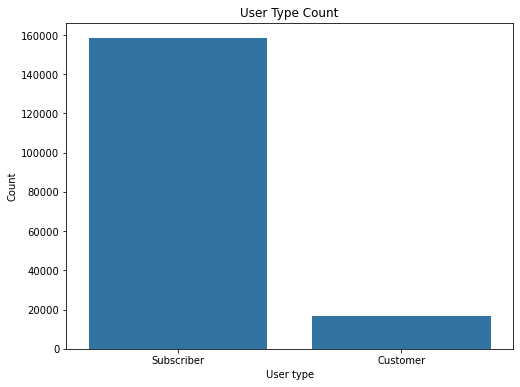

In [102]:
# plotting the type of the users
base_color = sb.color_palette()[0]
plt.figure(figsize = [8, 6])
sb.countplot(data = df, x = 'user_type', color = base_color, order = ['Subscriber', 'Customer'] )
plt.title('User Type Count')
plt.xlabel('User type')
plt.ylabel('Count');

> Subscriber users are much more than customer users

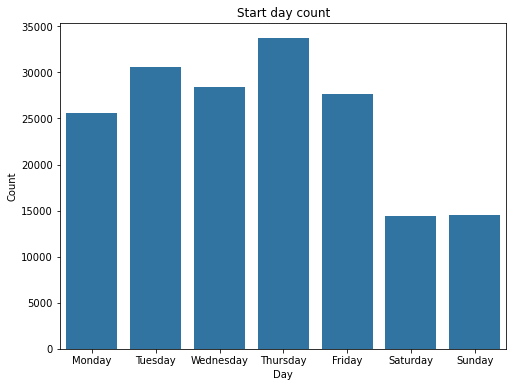

In [154]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [8, 6])
sb.countplot(data = df, x = 'start_day', color = base_color,
             order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Start day count')
plt.xlabel('Day')
plt.ylabel('Count');

> From that, we see that there are fewer users on the weekends than on the rest of the weekdays

In [113]:
b = df['member_gender'].value_counts()

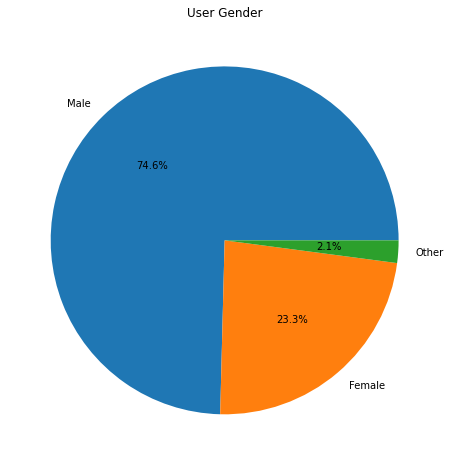

In [124]:
# plotting the gender of the users
b = df['member_gender'].value_counts()
plt.figure(figsize = [8, 8])
plt.pie(b, labels = b.index, autopct='%1.1f%%')
plt.title('User Gender');

> Clearly most of our users are males

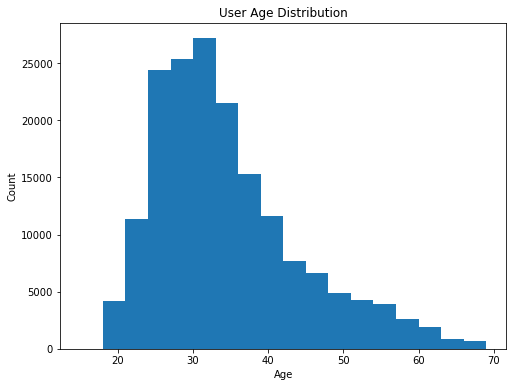

In [103]:
# plotting the age of the users
bins = np.arange(15, 70, 3)
plt.figure(figsize = [8, 6])
plt.hist(data = df, x = 'user_age', bins = bins)
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count');

> Most of the user's age is between 20 and 40 years old

#### I will convert duration columns from seconds to minutes to be easier to understand

In [149]:
df['duration_sec'] = df['duration_sec'] / 60

In [150]:
df.rename(columns={'duration_sec': 'duration_min'}, inplace=True)

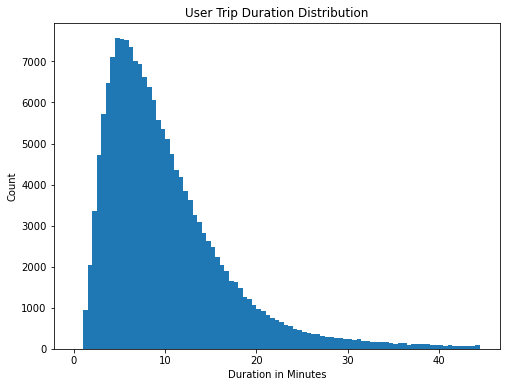

In [155]:
# plotting the duration of the users
bins = np.arange(0, 45, 0.5)
plt.figure(figsize = [8, 6])
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.title('User Trip Duration Distribution')
plt.xlabel('Duration in Minutes')
plt.ylabel('Count');

> Most of the user's Trip Duration is between 3 and 20 minutes

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> first, i converted the duration from seconds to minutes to be easy to understand and limit the plot to 45 minutes because the majority of the data is before 45 minutes and I found that the most users trip duration is between 3 and 20 minutes 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> other than trip duration I also limited the user age to 70 years old and under where the majority of the user's age in

## Bivariate Exploration

> In this section, i will investigate relationships between pairs of variables

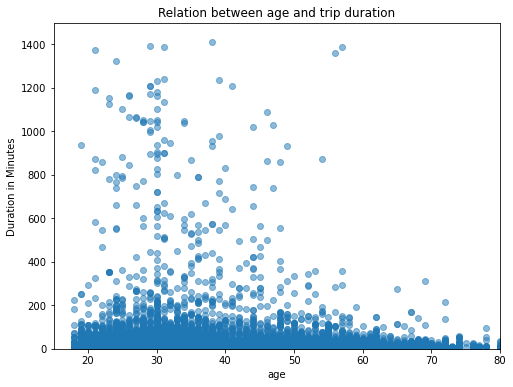

In [173]:
# plotting the relation between age and trip duration in scatter plot
plt.figure(figsize = [8, 6])
bins = np.arange(15, 70, 3)
plt.scatter(data = df, x = 'user_age', y = 'duration_min', alpha = 0.5)
plt.title('Relation between age and trip duration')
plt.xlabel('age')
plt.ylabel('Duration in Minutes')
plt.axis([15, 80, 0, 1500]);

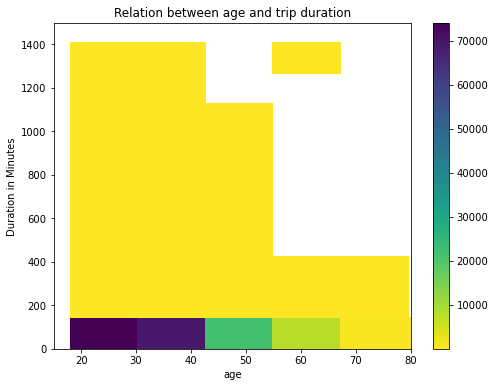

In [194]:
# plotting the relation between age and trip duration in heat map
plt.figure(figsize = [8, 6])
plt.hist2d(data = df, x = 'user_age', y = 'duration_min', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.title('Relation between age and trip duration')
plt.xlabel('age')
plt.ylabel('Duration in Minutes')
plt.axis([15, 80, 0, 1500]);

> from both plots, we can see that the younger the users the longer the trip duration will be

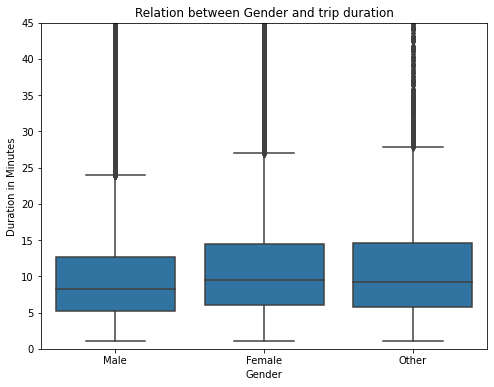

In [202]:
# plotting the relation between trip duration and gender
plt.figure(figsize = [8, 6])
sb.boxplot(data = df, x = 'member_gender', y = 'duration_min', color=base_color, 
           order = ['Male', 'Female', 'Other'])
plt.ylim([0, 45])
plt.title('Relation between Gender and trip duration')
plt.xlabel('Gender')
plt.ylabel('Duration in Minutes');

> we see here that other and female gender have longer trip duration than males but keep in mind that the portion of men in our data is much higher than other genders 

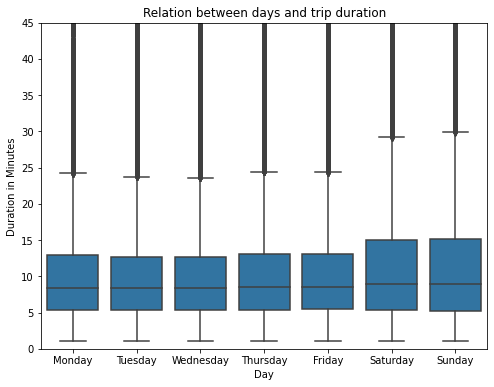

In [201]:
# plotting the relation between trip duration and days
plt.figure(figsize = [8, 6])
sb.boxplot(data = df, x = 'start_day', y = 'duration_min', color=base_color, 
           order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylim([0, 45])
plt.title('Relation between days and trip duration')
plt.xlabel('Day')
plt.ylabel('Duration in Minutes');

> looks like weekends users have a longer trip duration 

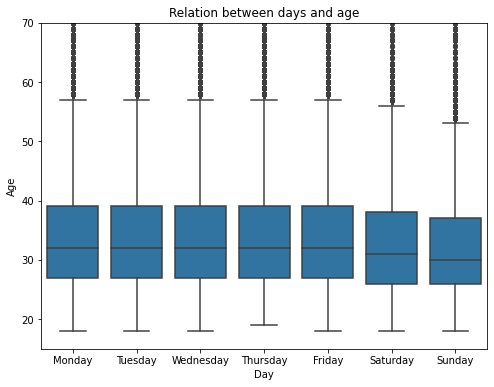

In [211]:
# plotting the relation between trip duration and age
plt.figure(figsize = [8, 6])
sb.boxplot(data = df, x = 'start_day', y = 'user_age', color=base_color, 
           order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylim([15, 70])
plt.title('Relation between days and age')
plt.xlabel('Day')
plt.ylabel('Age');

> there is nearly no difference in user's age for the weekdays but we see on weekends users are a bit younger 

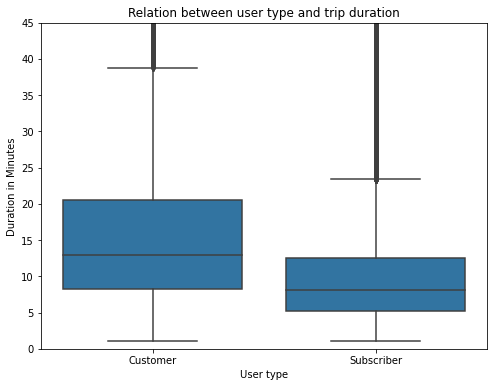

In [214]:
plt.figure(figsize = [8, 6])
sb.boxplot(data = df, x = 'user_type', y = 'duration_min', color=base_color)
plt.ylim([0, 45])
plt.title('Relation between user type and trip duration')
plt.xlabel('User type')
plt.ylabel('Duration in Minutes');

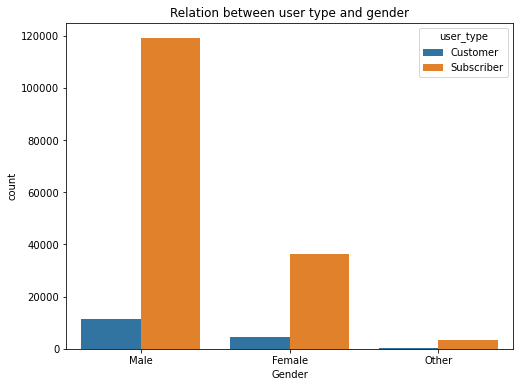

In [250]:
# plotting relation between user type and gender
plt.figure(figsize = [8, 6])
sb.countplot(data = df, x = 'member_gender', hue = 'user_type', order = ['Male', 'Female', 'Other'])
plt.title('Relation between user type and gender')
plt.xlabel('Gender')
plt.ylabel('count');

> From the last two plots, we can see subscriber users are much more than customer users in gender, and customer users have longer trip duration but also the portion of subscriber users is much higher than customer users so we can't be sure 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> we saw that trip duration had a lot of relationships with other features with age the longest trips was with users younger than 50 years old and and with gender other and females gender have longer trip duration than males but also males portion was mush higher than other genders so lets keep that in mind

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> relation between age and weekdays, users were a bit younger on weekends 

## Multivariate Exploration

> i will Create plots of three or more variables to investigate your data even
further

C:\Users\ahmed\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


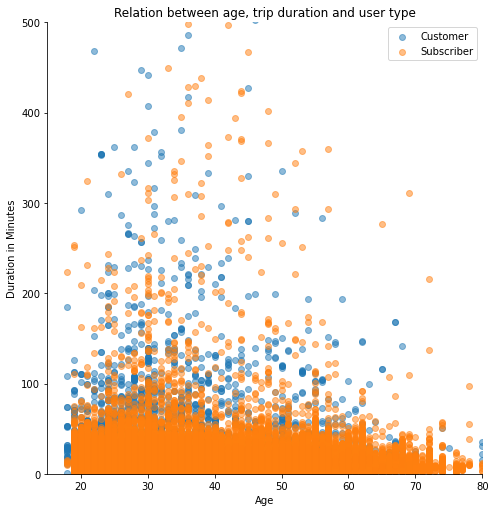

In [251]:
# plotting relation between user type, age and trip duration
g = sb.FacetGrid(data = df, hue = 'user_type', size = 7)
g.map(plt.scatter, 'user_age','duration_min', alpha = 0.5)
plt.axis([15, 80, 0, 500])
plt.legend()
plt.title('Relation between age, trip duration and user type')
plt.xlabel('Age')
plt.ylabel('Duration in Minutes');

C:\Users\ahmed\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


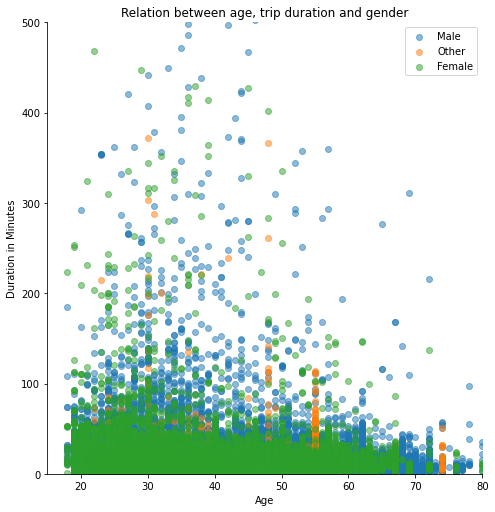

In [252]:
# plotting relation between user gender, age and trip duration
g = sb.FacetGrid(data = df, hue = 'member_gender', size = 7)
g.map(plt.scatter, 'user_age','duration_min', alpha = 0.5)
plt.axis([15, 80, 0, 500])
plt.legend()
plt.title('Relation between age, trip duration and gender')
plt.xlabel('Age')
plt.ylabel('Duration in Minutes');

C:\Users\ahmed\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


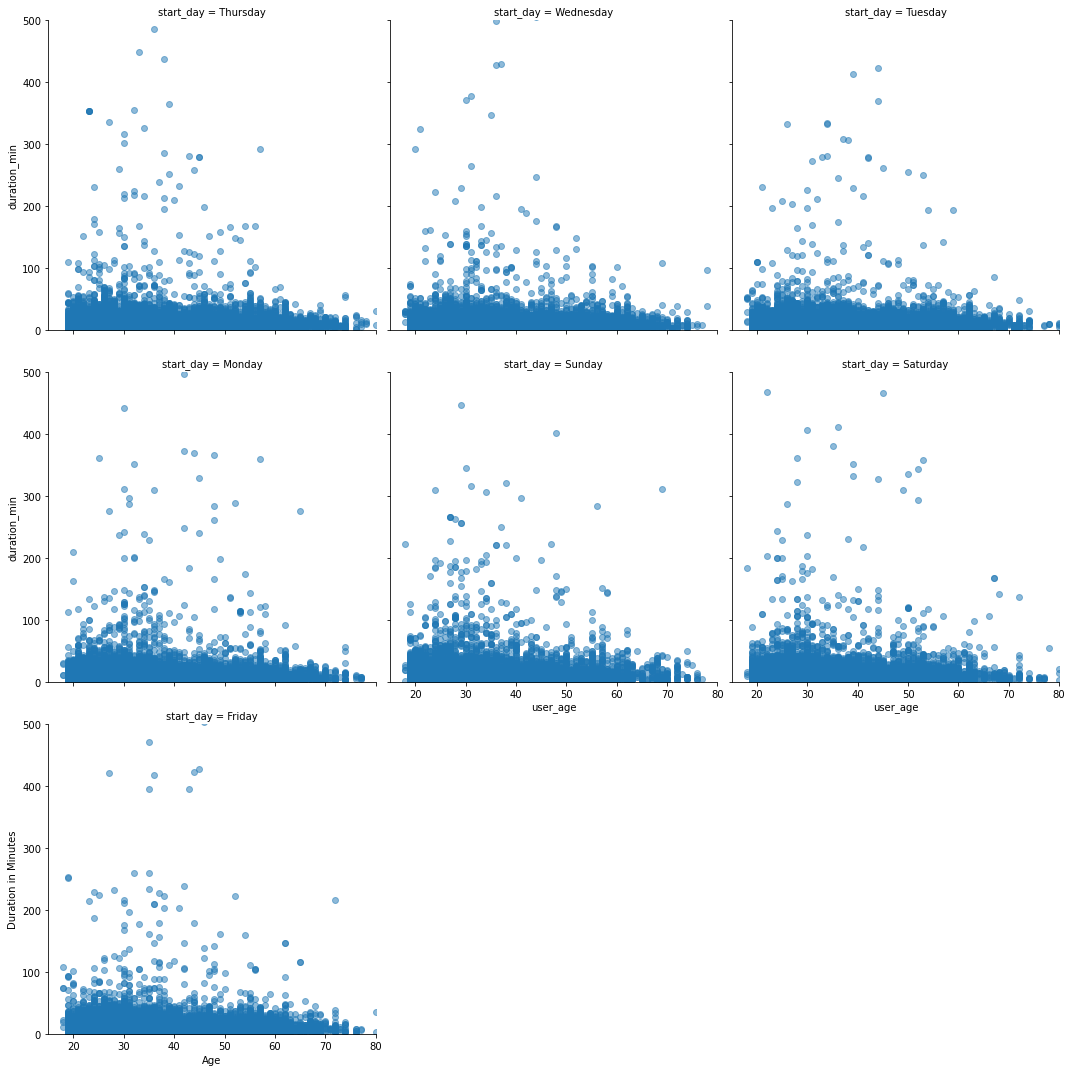

In [257]:
# plotting relation between start day, age and trip duration
g = sb.FacetGrid(data = df, col = 'start_day', col_wrap = 3, size = 5)
g.map(plt.scatter, 'user_age', 'duration_min', alpha = 0.5,)
plt.axis([15, 80, 0, 500])
plt.xlabel('Age')
plt.ylabel('Duration in Minutes');

> most of the old users are men and there trip duration is under 50 minutes 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Trip duration increases a bit in weekends from users are between 20 and 50 years old and most of the old users are men and their trip duration is under 50 minutes and younger subscriber users have longer trip than customer user

### Were there any interesting or surprising interactions between features?

> relation between age and trip duration for weekdays nearly looking the same